# Fluxonium

In [1]:
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loop1 = sq.Loop(A = 1e-6)

C = sq.Capacitor(3.6, 'GHz',Q=1e6 ,error=10)
L = sq.Inductor(0.46,'GHz',Q=500e6 ,loops=[loop1])
JJ = sq.Junction(10.2,'GHz',cap =C , A=1e-7, x=3e-06, loops=[loop1])

circuitElements = {
    (0, 1): [L, JJ]
}

cr1 = sq.Circuit(circuitElements)

cr1.truncationNumbers([100])

numEig = 5

phiExt = np.linspace(0, 1, 500)*2*np.pi

decay = {'capacitive':np.zeros_like(phiExt),
         'inductive':np.zeros_like(phiExt),
         'cc':np.zeros_like(phiExt),
         'quasiparticle':np.zeros_like(phiExt),
         'flux':np.zeros_like(phiExt)}

eigenValues = np.zeros((numEig, len(phiExt)))

for i, phi in enumerate(phiExt):
    loop1.setFlux(phi)
    eigenValues[:, i], _ = cr1.diag(numEig=5)
    for decType in decay:
        decay[decType][i]=cr1.decRate(decType=decType, states=(1,0))

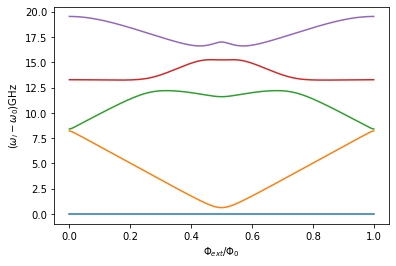

In [3]:
plt.figure()
for i in range(numEig):
    plt.plot(phiExt / 2 / np.pi, (eigenValues[i, :] - eigenValues[0, :]))

plt.xlabel(r"$\Phi_{ext}/\Phi_0$")
plt.ylabel(r"($\omega_i-\omega_0$)GHz")
plt.show()

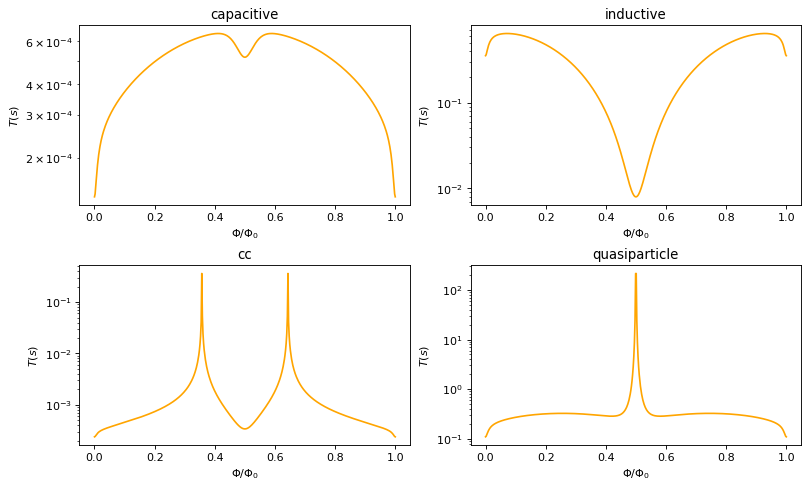

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True,dpi =80)
for decType, ax in zip(decay, axs.flat):
    ax.semilogy(phiExt/2/np.pi, 1/decay[decType],'orange')
    ax.set_title(decType)
    ax.set_xlabel(r"$\Phi/\Phi_0$")
    ax.set_ylabel(r"$T(s)$")

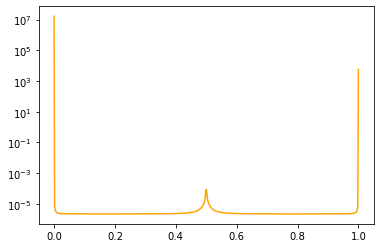

In [5]:
plt.semilogy(phiExt/2/np.pi, 1/decay['flux'],'orange')